In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    roc_auc_score, confusion_matrix, roc_curve, auc
)
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("G:\\Google Downloads\\Datafest_cleaned\\hypertension_subpopulation_test.csv")

In [5]:
df = df.drop(columns=['svy_id'])

In [7]:
 df = df.drop(columns=['chol_ldl_5cat',
 'chol_ldl_lt_70',
 'chol_ldl_gteq_70',
 'chol_ldl_lt_100',
 'chol_ldl_gteq_100',
 'chol_ldl_gteq_190',
 'chol_ldl_persistent'])

In [9]:
df = df.drop(columns=['chol_total_gteq_200',
 'chol_total_gteq_240', 'chol_nonhdl_5cat',
 'chol_nonhdl_lt_100',
 'chol_nonhdl_gteq_100',
 'chol_nonhdl_gteq_220', 'LBXTC',
 'LBDHDL',
 'LBDLDL',
 'LBXSTR_y',
 'FriedewaldLDL'])

In [11]:
df = df.drop(columns=['demo_age_cat'])

In [13]:
 df = df.drop(columns=['RIAGENDR','RIDAGEYR'])

In [15]:
df = df.drop(columns=['BPXSY1','BPXDI1','BPXSY2','BPXDI2','BPXSY3','BPXDI3'])

In [17]:
 df = df.drop(columns=['bp_sys_mean',
 'bp_dia_mean'])

In [19]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 1) Identify float columns and object columns
float_cols = df.select_dtypes(include=['float64']).columns
object_cols = df.select_dtypes(include=['object']).columns

# 2) Normalize (Min-Max scale) all float64 columns
scaler = MinMaxScaler()
df[float_cols] = scaler.fit_transform(df[float_cols])

# 3) Create dummy variables for object columns
#    - drop_first=True avoids the dummy variable trap by dropping one level
df = pd.get_dummies(df, columns=object_cols, drop_first=True)

# Check the transformed DataFrame
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26757 entries, 0 to 26756
Columns: 134 entries, svy_weight_mec to cc_cvd_any_Yes
dtypes: bool(49), float64(79), int64(6)
memory usage: 18.6 MB
None
   svy_weight_mec  svy_psu  svy_strata  svy_subpop_chol  demo_age_years  \
0        0.294110        2           6                1              37   
1        0.005035        2           3                1              18   
2        0.316326        2           5                1              39   
3        0.081778        1           3                0              37   
4        0.160189        2           1                0              34   

   chol_total  chol_hdl  chol_trig  chol_ldl  chol_nonhdl  ...  \
0    0.178808  0.109005   0.046990  0.666093     0.197505  ...   
1    0.189845  0.090047   0.037445  0.682753     0.216216  ...   
2    0.370861  0.146919   0.029001  0.776297     0.361746  ...   
3         NaN       NaN        NaN       NaN          NaN  ...   
4         NaN       N

In [ ]:
'bp_control_accaha_Yes'

In [21]:
df.columns.tolist()

['svy_weight_mec',
 'svy_psu',
 'svy_strata',
 'svy_subpop_chol',
 'demo_age_years',
 'chol_total',
 'chol_hdl',
 'chol_trig',
 'chol_ldl',
 'chol_nonhdl',
 'cc_acr',
 'cc_egfr',
 'cc_hba1c',
 'URXUMA',
 'URXUCR',
 'YEAR',
 'LBXSAL',
 'LBXSATSI',
 'LBXSASSI',
 'LBXSBU',
 'LBXSCA',
 'LBXSCH',
 'LBXSC3SI',
 'LBXSGTSI',
 'LBXSGL',
 'LBXSIR',
 'LBXSTP',
 'LBDSTPSI',
 'LBXSTR_x',
 'LBDSTRSI',
 'LBXSUA',
 'LBDSUASI',
 'LBXSNASI',
 'LBXSKSI',
 'LBXSCLSI',
 'LBXSOSSI',
 'LBXSGB',
 'LBDSGBSI',
 'BMXWT',
 'BMXHT',
 'BMXBMI',
 'BMXLEG',
 'BMXARML',
 'BMXARMC',
 'BMXWAIST',
 'BPQ020',
 'BPAARM',
 'BPACSZ',
 'LBXWBCSI',
 'LBXLYPCT',
 'LBXMOPCT',
 'LBXNEPCT',
 'LBXEOPCT',
 'LBXBAPCT',
 'LBDLYMNO',
 'LBDMONO',
 'LBDNENO',
 'LBDEONO',
 'LBDBANO',
 'LBXRBCSI',
 'LBXHGB',
 'LBXHCT',
 'LBXMC',
 'LBXRDW',
 'LBXPLTSI',
 'LBXMPSI',
 'Survey_Year',
 'LBDSPH',
 'LBDSTB',
 'LBDSCR',
 'SDDSRVYR',
 'RIDSTATR',
 'RIDEXMON',
 'RIDRETH1',
 'DMDHHSIZ',
 'INDFMPIR',
 'DMDHRGND',
 'WTINT2YR',
 'WTMEC2YR',
 'SDMVPSU',


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score
import xgboost as xgb

# Assuming df is your pandas DataFrame already loaded with data

# Define features and target
X = df.drop(columns=['bp_control_accaha_Yes'])
y = df['bp_control_accaha_Yes']

# Split the data into training and testing sets (e.g., 70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the XGBoost classifier
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions: probabilities for AUC and labels for confusion matrix & F1 score
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
y_pred = model.predict(X_test)

# Calculate evaluation metrics
auc = roc_auc_score(y_test, y_pred_prob)
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print out the results
print(f"AUC: {auc:.4f}")
print("Confusion Matrix:")
print(cm)
print(f"F1 Score: {f1:.4f}")


C:\Users\shiyi\.conda\envs\tf-gpu\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:31:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


AUC: 0.8708
Confusion Matrix:
[[5857  554]
 [ 934  683]]
F1 Score: 0.4786


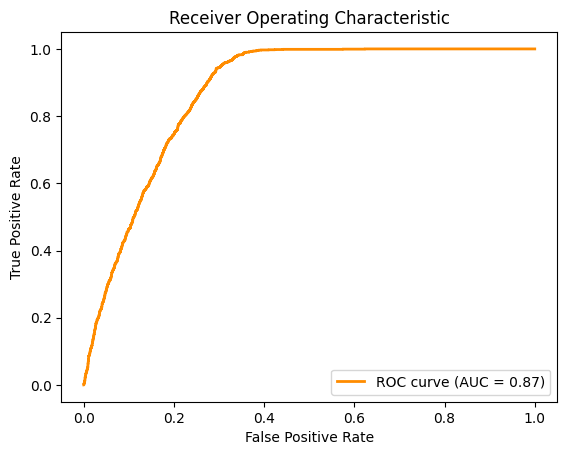

In [29]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute AUC using the function, ensuring no naming conflict
roc_auc_value = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_value:.2f})')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()


<Figure size 1200x800 with 0 Axes>

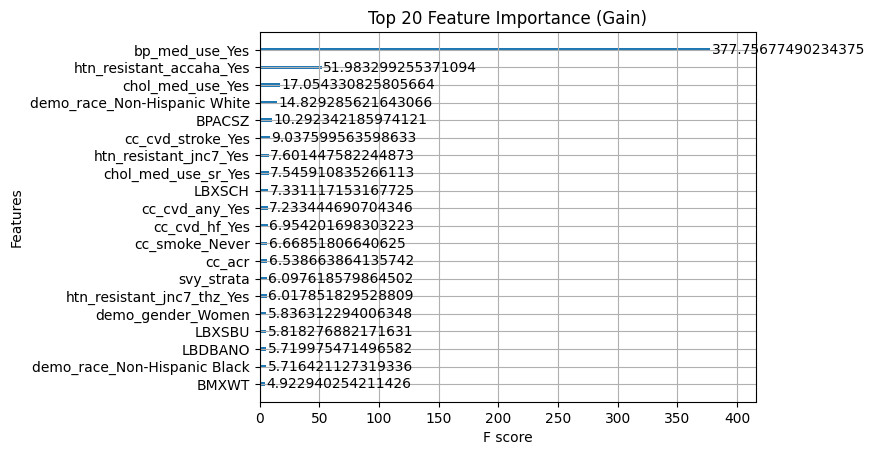

In [33]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Create a figure with a specified size
plt.figure(figsize=(12, 8))

# Plot the top 20 important features using 'gain' as the importance metric.
xgb.plot_importance(model, max_num_features=20, importance_type='gain')

# Add a title to the plot
plt.title("Top 20 Feature Importance (Gain)")

# Display the plot
plt.show()


In [37]:
df.columns.tolist()

['svy_weight_mec',
 'svy_psu',
 'svy_strata',
 'svy_subpop_chol',
 'demo_age_years',
 'chol_total',
 'chol_hdl',
 'chol_trig',
 'chol_ldl',
 'chol_nonhdl',
 'cc_acr',
 'cc_egfr',
 'cc_hba1c',
 'URXUMA',
 'URXUCR',
 'YEAR',
 'LBXSAL',
 'LBXSATSI',
 'LBXSASSI',
 'LBXSBU',
 'LBXSCA',
 'LBXSCH',
 'LBXSC3SI',
 'LBXSGTSI',
 'LBXSGL',
 'LBXSIR',
 'LBXSTP',
 'LBDSTPSI',
 'LBXSTR_x',
 'LBDSTRSI',
 'LBXSUA',
 'LBDSUASI',
 'LBXSNASI',
 'LBXSKSI',
 'LBXSCLSI',
 'LBXSOSSI',
 'LBXSGB',
 'LBDSGBSI',
 'BMXWT',
 'BMXHT',
 'BMXBMI',
 'BMXLEG',
 'BMXARML',
 'BMXARMC',
 'BMXWAIST',
 'BPQ020',
 'BPAARM',
 'BPACSZ',
 'LBXWBCSI',
 'LBXLYPCT',
 'LBXMOPCT',
 'LBXNEPCT',
 'LBXEOPCT',
 'LBXBAPCT',
 'LBDLYMNO',
 'LBDMONO',
 'LBDNENO',
 'LBDEONO',
 'LBDBANO',
 'LBXRBCSI',
 'LBXHGB',
 'LBXHCT',
 'LBXMC',
 'LBXRDW',
 'LBXPLTSI',
 'LBXMPSI',
 'Survey_Year',
 'LBDSPH',
 'LBDSTB',
 'LBDSCR',
 'SDDSRVYR',
 'RIDSTATR',
 'RIDEXMON',
 'RIDRETH1',
 'DMDHHSIZ',
 'INDFMPIR',
 'DMDHRGND',
 'WTINT2YR',
 'WTMEC2YR',
 'SDMVPSU',
